# 7.  PyTorch를 통한 로지스틱 회귀분석

## 1. 로지스틱 회귀분석이란

### 1.1 로지스틱 회귀분석 기초

#### 분류 알고리즘

- 예: 스팸 vs 비 스팸
    - Input: 여러 단어들
    - Output: 스팸인지 아닌지에 대한 확률

#### 단순 비교

- **Linear regression**
    - Output: 주어진 inputs에 대한 숫자 값
- **Logistic regression**
    - Output: 주어진 input에 대해 어떤 클래스에 속하는지에 관해 [0, 1]사이에 존재하는 확률.

#### Input/Output 비교

- **Linear regression: 곱**
    - Input: [1]
        - Output: 2
    - Input: [2]
        - Output: 4
    - Trying to model the relationship y = 2x
- **Logistic regression: Spam**
    - Input: "오늘 100만 달러를 위해 가입하세요!"
        - Output: p = 0.8
    - Input: "아마존 최근 구내 내역 정보입니다"
        - Output: p = 0.3
    - **p: spam일 확률**

### 1.2 선형 회귀분석의 문제점

- 예
    - 열
    - **Input**: 온도
    - **Output**: 열인지 열이 아닌지
- Remember
    - **Linear regression**: 선과 점들의 오차의 사이를 줄여준다.

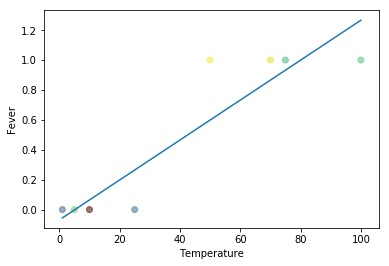

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

** 회귀 분석의 문제점 1 **<br>
열(Fever)의 값이 음수가 되거나(0 이하) 양수(1 이상)이 된다.

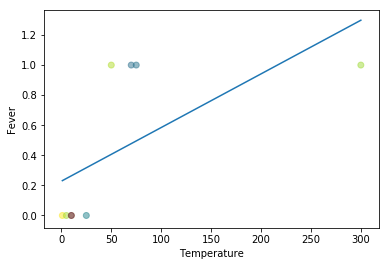

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

**Linear Regression Problem 2**<br>
outliers가 영향을 많이 주어서 Fever 점들을 잘 표현하지 못한다.

### 1.3 로지스틱 회귀분석 들여다보기

#### 확률을 예상하기

- 회귀분석은 통하지 않는다.
- 직접 값을 예상하는 대신: **확률 예측**

<img src = './images/07-01.png'>

**Logistic Function** $g()$
- Two-class logistic regression
- $y= Ax + b$
- $g(y) = Ax + b$
- $g(y) = \frac{1}{1+e^{-y}} = \frac{1}{1+e^{-(Ax + b)}} $
- $g(y)$ = $x$가 주어졌을때, $y = 1 $일 추정된 확률

**Softmax Function** $g()$
- Multi-class 로지스틱 회귀분석
- 일반화된 로지스틱 회귀분석

** Cross Entropy Funciton ** $D()$<br>

S: Softmax, L: Label
- $D(S, L) = L\log S - (1 - L) \log (1-S)$
    - IF L = 0 (label)
        - $D(S, 0) = - \log(1-S)$
            - $-log(1-S)$: less positive if S $\rightarrow$ 0
            - $-log(1-S)$: more positive if S $\rightarrow$ 1 (BIGGER LOSS)
    - IF L = 1 (label)
        - $D(S, 1) = logS$
            - $logS$: less negative if S $\rightarrow$ 1
            - $logS$: more negative if S $\rightarrow$ 0 (BIGGER LOSS)

In [6]:
import math
print (-math.log(1 - 0.00001))
print (-math.log(1 - 0.99999))

print (math.log(0.99999))
print (math.log(0.00001))

1.0000050000287824e-05
11.51292546497478
-1.0000050000287824e-05
-11.512925464970229


** Cross Entropy Loss $L$ **
- Goal: Cross Entropy Loss를 최소화하기
- $L = \frac{1}{N}\sum_{i}D(g(Ax_i + b), L_i)$

## 2. Building a Logistic Regression Model with PyTorch

<img src = './images/07-02.png'>

#### Steps

- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

#### 스텝 1a: MNIST Train Dataset 불러오기
**0 에서 9까지의 이미지**

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [12]:
train_dataset = dsets.MNIST(root='./data',
                            train=True, # This is training set
                            transform=transforms.ToTensor(), # We deal with tensor not numpy
                            download=True)

In [4]:
len(train_dataset)

60000

In [5]:
train_dataset[0]

(tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.000

In [6]:
type(train_dataset[0])

tuple

In [7]:
len(train_dataset[0])

2

In [8]:
# Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [9]:
# Label
train_dataset[0][1]

tensor(5)

** MNIST 출력하기 **

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [11]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [12]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

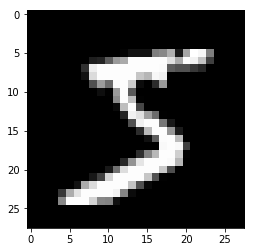

In [13]:
plt.imshow(show_img, cmap='gray')

In [14]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

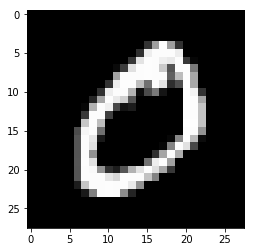

In [15]:
plt.imshow(show_img, cmap='gray')

In [16]:
# Label
train_dataset[1][1]

tensor(0)

#### 스텝 1b: MNIST Test 데이터셋 불러오기
- 학습데이터 밖에서도 알고리즘이 잘 동작하는 것을 확인하자.
- 샘플 밖에 있는 데이터들

In [4]:
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform = transforms.ToTensor())

In [5]:
len(test_dataset)

10000

In [6]:
type(test_dataset[0])

tuple

In [7]:
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

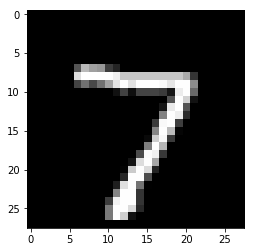

In [21]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [22]:
# Label
test_dataset[0][1]

tensor(7)

#### 스텝 2: Make Dataset Iterable

- 목적: 데이터 셋이 순환 가능한 형태로 만들자.
- **totaldata**: 60000
- **minibatch**: 100
    - 1회 iteration시 사용되는 샘플의 숫자
- **iterations** : 3000
    - 1 iteration: 1회의 미니배치가 forward & backward 하는 경우
- **epochs**
    - 1 epoch : 전체 데이터셋을 한번 다 도는 것

- $epochs$ = $iterations$ $\div$ $\frac{totaldata}{minibatch}$ = 3000 $\div$ $\frac{60000}{100}$ = 5
    - 전체 데이터셋을 5번 도는 것

In [13]:
len(train_dataset)

60000

In [14]:
batch_size = 100

In [15]:
n_iters = 3000

In [16]:
num_epochs =  n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

#### 순환 가능한 객체 만들기: Training Dataset

In [19]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

#### 순환 가능한 객체인지 확인하기

In [20]:
import collections
isinstance(train_loader, collections.Iterable)

True

#### 순환 가능한 객체 만들기: Testing Dataset

In [21]:
# 반환 가능한(Iterable object)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

#### 순환 가능한지 확인하기

In [22]:
isinstance(test_loader, collections.Iterable)

True

In [26]:
isinstance( "hello", str)

True

#### 주요 목표: 데이터셋을 순환시키기

In [27]:
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]

In [28]:
# Need to iterate
# Think of numbers as the images
for i in lst:
    print (i.shape)

(28, 28)
(28, 28)


#### 스텝 3: 모델 생성하기

In [30]:
# 선형 회귀분석과 같다!
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

#### Step 4: 모델 클래스 인스턴스화 하기

- Input 차원수:
    - Size of image
    - 28 $\times$ 28 = 784
- Output 차원수: 10
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [31]:
# 이미지들의 크기
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [34]:
input_dim = 28 * 28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#### 스텝 5: Loss 클래스 인스턴스화 하기

- **Logistic Regression **: Cross Entropy Loss
    - Linear Regression: MSE

In [32]:
criterion = nn.CrossEntropyLoss()

** nn.CrossEntropyLoss() 에서 어떤 일이 일어날까??**
- 소프트맥스 계산 softmax (로지스틱 / 소프트맥스 함수)
- cross entropy 계산

#### Step 6: 최적화 Class 인스턴스화

- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_{\theta}$
        - $\theta$: 파라미터들 (우리의 변수들)
        - $\eta$: 학습률 (얼마나 빨리 학습시키길 원하는가)
        - $\nabla_{\theta}$: 파라미터들의 그라디언트
        
    - 더욱 간단한 수식
        - 파라미터들 = 파라미터들 - 학습률 * 파라미터들의 그라디언트
        - **iteration이 순환될 때마다, 모델의 파라미터를 업데이트한다**

In [36]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Parameters In-Depth

In [37]:
print (model.parameters())

print (len(list(model.parameters())))

# FC 1 Parameters
print (list(model.parameters())[0].size())

# FC 1 Bias Parameters
print (list(model.parameters())[1].size())

<generator object Module.parameters at 0x10d5b79e8>
2
torch.Size([10, 784])
torch.Size([10])


#### Quick Dot Product Review


- Example 1: **dot product**
    - A: (100, 10)
    - B: (10, 1)
    - A$\cdot$B = (100, 10) $\cdot$ (10, 1) = (100, 1)

- Example 2: **dot product**
    - A: (50, 5)
    - B: (5, 2)
    - A$\cdot$B = (50, 5)$\cdot$(5, 2) = (50, 2)
    
- Example 3: **element-wise addition**
    - A: (10, 1)
    - B: (10, 1)
    - A + B = (10, 1)

<img src = "./images/07-03.png">

#### Step 7: 학습 모델
- 과정
    1. 인풋과 라벨을 variables로 변환한다
    2. 그라디언트 버퍼들을 비워준다
    3. 인풋에 근거한 아웃풋을 얻는다.
    4. loss를 얻는다
    5. 파라미터들에 관한 그라디언트를 얻는다.
    6. 그라디언트를 사용하여 파라미터들을 업데이트한다.
        - 파라미터들 = 파라미터들 - 학습률 * 파라미터들의 그라디언트
    7. 반복

In [55]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # 이미지들을 Variable 형태로 로드
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # 파라미터들에 관한 그라디언트 버퍼 클리어
        optimizer.zero_grad()
        
        # output/logits을 얻기 위한 Forward 전달
        outputs = model(images)
        
        # 손실 계산: 소프트맥스 --> 크로스 엔트로피 손실
        loss = criterion(outputs, labels)
        
        # 파라미터들에 관한 그라디언트들 얻기
        loss.backward()
        
        # 파라미터들 업데이트시키기
        optimizer.step()
        
        iter += 1
        
        # iteration 500번마다 성능 계산
        if iter % 500 == 0:
            
            # 정확도 계산
            correct = 0
            total = 0
            
            # 테스트 데이터셋 순환하기
            for images, labels in test_loader:
                
                # 이미지를 Torch 변수 형태로 로드하기
                images = Variable(images.view(-1, 28*28))
                
                # logits/output을 얻기 위한 Forward 전달
                outputs = model(images)
                
                # 가장 큰 값을 통해서 예측치 얻기
                _, predicted = torch.max(outputs.data, 1)
                
                # 전체 라벨의 수
                total += labels.size(0)
                
                # 전체 맞춘 예측의 수
                correct += (predicted == labels).sum()
            
            accuracy = 100 * int(correct) / int(total)
            
            # Loss 출력
            print (f'Iteration: {iter}, Loss: {loss.item()}, Accuracy: {accuracy}')

Iteration: 500, Loss: 0.46783608198165894, Accuracy: 90.15
Iteration: 1000, Loss: 0.2694939970970154, Accuracy: 90.11
Iteration: 1500, Loss: 0.3948320150375366, Accuracy: 90.16
Iteration: 2000, Loss: 0.27397826313972473, Accuracy: 90.15
Iteration: 2500, Loss: 0.5396678447723389, Accuracy: 90.16
Iteration: 3000, Loss: 0.36306166648864746, Accuracy: 90.18


**torch.max()**

In [56]:
a = torch.randn(6, 4)

In [57]:
a

tensor([[-0.9671,  2.7574,  0.7807,  0.8198],
        [-0.0599,  0.3454,  0.3268, -0.1090],
        [-1.6528, -0.0281, -0.1276,  0.4993],
        [ 1.6659, -0.0836, -1.3640,  0.9543],
        [-0.7593,  0.9254, -0.8175,  0.1619],
        [ 0.7820, -0.6061,  0.7553, -0.0468]])

In [58]:
torch.max(a, 1)

(tensor([ 2.7574,  0.3454,  0.4993,  1.6659,  0.9254,  0.7820]),
 tensor([ 1,  1,  3,  0,  1,  0]))

In [59]:
torch.max(a, 0)

(tensor([ 1.6659,  2.7574,  0.7807,  0.9543]), tensor([ 3,  0,  0,  3]))

In [44]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    if iter_test == 1:
        print ('OUTPUTS')
        print (outputs.size())
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
torch.Size([100, 10])


In [45]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    if iter_test == 1:
        print ('OUTPUTS')
        print (outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([-0.3023, -1.2186, -0.4442, -0.2584, -0.1548, -0.4458, -1.0819,
         2.8348, -0.2817,  0.9246])


In [46]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print ('PREDICTION')
        print (predicted.size())

PREDICTION
torch.Size([100])


In [47]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print ('PREDICTION')
        print (predicted[0])

PREDICTION
tensor(7)


In [48]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    if iter_test == 1:
        print ('PREDICTION')
        print (predicted[0])
        print ('-'*9)
        print ('LABEL SIZE')
        print (labels.size())
        print ('-'*9)
        print ('LABEL FOR IMAGE 0')
        print (labels[0])

PREDICTION
tensor(7)
---------
LABEL SIZE
torch.Size([100])
---------
LABEL FOR IMAGE 0
tensor(7)


In [49]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    if iter_test == 1:
        print ('PREDICTION')
        print (predicted[1])
        print ('-'*9)
        print ('LABEL SIZE')
        print (labels.size())
        print ('-'*9)
        print ('LABEL FOR IMAGE 1')
        print (labels[1])

PREDICTION
tensor(2)
---------
LABEL SIZE
torch.Size([100])
---------
LABEL FOR IMAGE 1
tensor(2)


In [50]:
correct = 0
total = 0
iter_test = 0

for images, labels in test_loader:

    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Total number of labels
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted == labels).sum()

accuracy = 100 * int(correct) / int(total)

print (accuracy)

82.96


In [51]:
(predicted == labels).sum()

tensor(79)

In [52]:
# Explaining .sum() python built-in function
# correct += (predicted == labels).sum()
import numpy as np
a = np.ones((10))
print (a)

b = np.ones((10))
print (b)

print (a == b)

print ((a == b).sum())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ True  True  True  True  True  True  True  True  True  True]
10


** 모델 저장하기 **

In [53]:
save_model = False
if save_model is True:
    # Saves only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')

## 3. PyTorch를 통한 로지스틱 회귀분석 모델 만들기 (GPU)

** CPU Version **

In [64]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

'''
STEP 1: 데이터셋 로드
'''

train_dataset = dsets.MNIST(root = './data',
                            train = True,
                            transform = transforms.ToTensor(),
                            download = True)

test_dataset = dsets.MNIST(root = './data',
                           train = False,
                           transform = transforms.ToTensor())


'''
STEP 2: 데이터셋을 순환 가능한 형태로 만들기
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset= test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

'''
STEP 3: 모델 클래스 생성
'''

class LogisticRegressionModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
'''
STEP 4: 모델 클래스 인스턴스화
'''

input_dim = 28 * 28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)


'''
STEP 5: 손실 클래스 인스턴스화
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: 최적화 클래스 인스턴스화
'''
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: 모델 학습시키기
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 이미지들을 Variable 형태로 로드
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # 파라미터들에 관한 그라디언트 버퍼를 비워준다
        optimizer.zero_grad()
        
        # output/logits을 얻기 위해 Forward 전달
        # 100 x 10
        outputs = model(images)
        
        # Loss 계산: 소프트맥스 --> 크로스 엔트로피 손실
        loss = criterion(outputs, labels)
        
        # 파라미터들에 관한 그라디언트들 구하기
        loss.backward()
        
        # 파라미터들 업데이트하기
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # 정확도 계산
            correct = 0
            total = 0
            # 테스트 데이터셋 순환
            for images, labels in test_loader:
                # Torch Variable 형태로 이미지 로드
                images = Variable(images.view(-1, 28*28))
                
                # logits/output을 얻기 위한 Forward 전달
                outputs = model(images)
                
                # 가장 큰 값을 통해서 예측
                # 100 x 1
                _, predicted = torch.max(outputs.data, 1)
                
                # 라벨들의 총 개수
                total += labels.size(0)
                
                # 총 맞춘 예측치들
                correct += (predicted == labels).sum()
                
            accuracy = 100 * int(correct) / int(total)
            
            # LOSS 출력
            print (f'Iteration: {iter}, Loss: {loss.item()}, Accuracy: {accuracy}')

Iteration: 500, Loss: 1.8782968521118164, Accuracy: 67.45
Iteration: 1000, Loss: 1.524390459060669, Accuracy: 77.73
Iteration: 1500, Loss: 1.3914158344268799, Accuracy: 80.14
Iteration: 2000, Loss: 1.148782730102539, Accuracy: 81.47
Iteration: 2500, Loss: 1.1579616069793701, Accuracy: 82.35
Iteration: 3000, Loss: 0.9467718601226807, Accuracy: 83.09


GPU: GPU를 돌리기 위해 2가지 설정이 필요하다

- model
- variables

In [65]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

if torch.cuda.is_available():
    model.cuda()

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 28*28).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 28*28).cuda())
                else:
                    images = Variable(images.view(-1, 28*28))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
                    
            
            accuracy = 100 * int(correct) / int(total)
            
            # Print Loss
            print (f'Iteration: {iter}, Loss: {loss.item()}, Accuracy: {accuracy}')

Iteration: 500, Loss: 1.8790545463562012, Accuracy: 69
Iteration: 1000, Loss: 1.5877498388290405, Accuracy: 77
Iteration: 1500, Loss: 1.3639423847198486, Accuracy: 80
Iteration: 2000, Loss: 1.25637948513031, Accuracy: 81
Iteration: 2500, Loss: 1.1072089672088623, Accuracy: 82
Iteration: 3000, Loss: 1.0554050207138062, Accuracy: 83


# 요약

- **로지스틱 회귀분석** 기초
- **회귀 분석**의 **문제**
- 로지스틱 회귀분석 깊이 **들여다보기**
    1. logits 구하기
    2. Softmax 구하기
    3. cross-entropy loss 구하기
- **목적**: cross-entropy loss 줄이기
- **로지스틱 회귀분석** 모델 생성
    - Step 1: 데이터셋 로드
    - Step 2: 데이터셋 순환 가능하게 하기
    - Step 3: 모델 클래스 만들기
    - Step 4: 모델 클래스 인스턴스화
    - Step 5: 손실 클래스 인스턴스화
    - Step 6: 최적화 클래스 인스턴스화
    - Step 7: 모델 학습하기
- **GPU** 를 사용하기 위해 중요한 점
    - model
    - variables